# Derivation of the potential using simpy

In [1]:
%matplotlib widget

In [95]:
import sympy as sp

# Definimos las variables simbólicas
X1, X2 = sp.symbols('X1 X2')
tau, phi_p, phi_pp, phi_ppp, s0, c,g, phi_Ip = sp.symbols('tau phi_p phi_pp phi_ppp s0 c g phi_Ip')
I_L, I_C, I_R, s_L, s_C, s_R, R = sp.symbols('I_L I_C I_R s_L s_C s_R R')

# Definimos los componentes del campo vectorial (parte determinista, sin ruido)
F1 = -(
    (phi_p/2)*(I_L - I_C + X1*(s_L+s_C) + (R+X2)*(s_L-s_C)) +
    (s0*phi_pp/2)*(
         R*(s_L+s_C) + I_L + I_C + (2*(s0-c*g*phi_Ip))/(3*c*g*phi_Ip)*(I_L+I_C+I_R + R*(s_L+s_C+s_R))
    )*X1 +
    (s0*phi_pp/2)*(R*(s_L-s_C) + I_L - I_C)*X2 +
    s0**2 * phi_pp * X1*X2 +
    ((s0-c*g*phi_Ip)/(3*c*g*phi_Ip))* s0**3 * (phi_pp**2) * X1*(X1**2+3*X2**2) +
    (phi_ppp*s0**3/6)* X1*(X1**2+3*X2**2)
)

F2 = -3*(
    (phi_p/6)*(X1*(s_L-s_C) + X2*(s_L+s_C+4*s_R) + I_L + I_C - 2*I_R + R*(s_L+s_C-2*s_R)) +
    (s0*phi_pp/6)*(
         R*(s_L+s_C+4*s_R) + (I_L+I_C+4*I_R) + ((s0-c*g*phi_Ip)/(2*c*g*phi_Ip))*(I_L+I_C+I_R + R*(s_L+s_C+s_R))
    )*X2 +
    (s0*phi_pp/6)*(R*(s_L-s_C) + I_L - I_C)*X1 +
    (s0**2 * phi_pp/6)*(X1**2-3*X2**2) +
    ((s0-c*g*phi_Ip)/(3*c*g*phi_Ip))* s0**3 * (phi_pp**2) * X2*(X1**2+3*X2**2) +
    (phi_ppp*s0**3/6)* X2*(X1**2+3*X2**2)
)


curl = sp.simplify(sp.diff(F2, X1) - sp.diff(F1, X2))
print("Curl del campo:", curl)

U = sp.integrate(F1, X1)
U += sp.integrate(F2 - sp.diff(U, X2), X2)


# Simplificamos el potencial obtenido
U_simpl = sp.simplify(U)

# Mostramos el potencial (forma simbólica y en LaTeX)
print("Potencial U:")
print("\nForma LaTeX:")
print(sp.latex(U_simpl))
U_simpl

Curl del campo: 0
Potencial U:

Forma LaTeX:
\frac{X_{1}^{4} s_{0}^{3} \left(2 c g \phi_{Ip} \phi_{pp}^{2} - c g \phi_{Ip} \phi_{ppp} - 2 \phi_{pp}^{2} s_{0}\right) + 2 X_{1}^{2} \left(- I_{C} c g \phi_{Ip} \phi_{pp} s_{0} - 2 I_{C} \phi_{pp} s_{0}^{2} - I_{L} c g \phi_{Ip} \phi_{pp} s_{0} - 2 I_{L} \phi_{pp} s_{0}^{2} + 2 I_{R} c g \phi_{Ip} \phi_{pp} s_{0} - 2 I_{R} \phi_{pp} s_{0}^{2} - R c g \phi_{Ip} \phi_{pp} s_{0} s_{C} - R c g \phi_{Ip} \phi_{pp} s_{0} s_{L} + 2 R c g \phi_{Ip} \phi_{pp} s_{0} s_{R} - 2 R \phi_{pp} s_{0}^{2} s_{C} - 2 R \phi_{pp} s_{0}^{2} s_{L} - 2 R \phi_{pp} s_{0}^{2} s_{R} + 6 X_{2}^{2} c g \phi_{Ip} \phi_{pp}^{2} s_{0}^{3} - 3 X_{2}^{2} c g \phi_{Ip} \phi_{ppp} s_{0}^{3} - 6 X_{2}^{2} \phi_{pp}^{2} s_{0}^{4} - 6 X_{2} c g \phi_{Ip} \phi_{pp} s_{0}^{2} - 3 c g \phi_{Ip} \phi_{p} s_{C} - 3 c g \phi_{Ip} \phi_{p} s_{L}\right) + 9 X_{2}^{4} s_{0}^{3} \left(2 c g \phi_{Ip} \phi_{pp}^{2} - c g \phi_{Ip} \phi_{ppp} - 2 \phi_{pp}^{2} s_{0}\right) - 3 X_{2}^{2} \le

(X1**4*s0**3*(2*c*g*phi_Ip*phi_pp**2 - c*g*phi_Ip*phi_ppp - 2*phi_pp**2*s0) + 2*X1**2*(-I_C*c*g*phi_Ip*phi_pp*s0 - 2*I_C*phi_pp*s0**2 - I_L*c*g*phi_Ip*phi_pp*s0 - 2*I_L*phi_pp*s0**2 + 2*I_R*c*g*phi_Ip*phi_pp*s0 - 2*I_R*phi_pp*s0**2 - R*c*g*phi_Ip*phi_pp*s0*s_C - R*c*g*phi_Ip*phi_pp*s0*s_L + 2*R*c*g*phi_Ip*phi_pp*s0*s_R - 2*R*phi_pp*s0**2*s_C - 2*R*phi_pp*s0**2*s_L - 2*R*phi_pp*s0**2*s_R + 6*X2**2*c*g*phi_Ip*phi_pp**2*s0**3 - 3*X2**2*c*g*phi_Ip*phi_ppp*s0**3 - 6*X2**2*phi_pp**2*s0**4 - 6*X2*c*g*phi_Ip*phi_pp*s0**2 - 3*c*g*phi_Ip*phi_p*s_C - 3*c*g*phi_Ip*phi_p*s_L) + 9*X2**4*s0**3*(2*c*g*phi_Ip*phi_pp**2 - c*g*phi_Ip*phi_ppp - 2*phi_pp**2*s0) - 3*X2**2*(I_C*c*g*phi_Ip*phi_pp*s0 + I_C*phi_pp*s0**2 + I_L*c*g*phi_Ip*phi_pp*s0 + I_L*phi_pp*s0**2 + 7*I_R*c*g*phi_Ip*phi_pp*s0 + I_R*phi_pp*s0**2 + R*c*g*phi_Ip*phi_pp*s0*s_C + R*c*g*phi_Ip*phi_pp*s0*s_L + 7*R*c*g*phi_Ip*phi_pp*s0*s_R + R*phi_pp*s0**2*s_C + R*phi_pp*s0**2*s_L + R*phi_pp*s0**2*s_R + 2*c*g*phi_Ip*phi_p*s_C + 2*c*g*phi_Ip*phi_p*s_L 

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
import sympy as sp

x = sp.symbols('x', real=True)
s0, R, R_I, I0, c, I_I = sp.symbols('s0 R R_I I0 c I_I', real=True)

phi = sp.Piecewise(
    (0, x < 0),
    (x**2, sp.And(x >= 0, x <= 1)),
    (2*sp.sqrt(x) - sp.Rational(3, 4), x > 1)
)

phi_prime = sp.diff(phi, x)
phi_double_prime = sp.diff(phi_prime, x)
phi_triple_prime = sp.diff(phi_double_prime, x)



In [264]:

s0_val = 1
IL_val, IC_val, IR_val = 1,1,1
sL_val, sC_val, sR_val = 0,0,0
c_val = 1        
g_val = 1  
I_I_val = 1/3

X0 = s0*R - c*R_I + I0
X0_I = g*R+I_I


phi_X0 = sp.simplify(phi.subs(x, X0))
phi_prime_X0 = sp.simplify(phi_prime.subs(x, X0))
phi_double_prime_X0 = sp.simplify(phi_double_prime.subs(x, X0))
phi_triple_prime_X0 = sp.simplify(phi_triple_prime.subs(x, X0))

phi_X0 = sp.simplify(phi.subs(x, X0))
phi_prime_X0 = sp.simplify(phi_prime.subs(x, X0))
phi_I_prime = sp.simplify(phi_prime.subs(x, X0_I))
phi_I = sp.simplify(phi.subs(x, X0_I))

eq1 = s0*phi_prime_X0-1
eq2 = R - phi_X0 
eq3 = R_I - phi_I
eq1 = eq1.subs({s0:s0_val, c:c_val, g:g_val, I_I:I_I_val})
eq2 = eq2.subs({s0:s0_val, c:c_val, g:g_val, I_I:I_I_val})
eq3 = eq3.subs({s0:s0_val, c:c_val, g:g_val, I_I:I_I_val})
F_so = sp.lambdify(
    (R, R_I, I0),
    (eq1, eq2, eq3),
    'numpy'
)

def fun(vars):
    R_val, R_I_val, I0_val = vars
    return F_so(R_val, R_I_val, I0_val)

x0 = [1/4, 1/4, 1/2]
R_val, R_I_val, I0_val = fsolve(fun, x0)

print("Valores de R, R_I, I0:")
print(f"R = {R_val}, R_I = {R_I_val}, I0 = {I0_val}")

# Definición de X₀ (aunque en el potencial no se reemplace directamente, se utiliza para interpretar φ, etc.)
phi_p_val = sp.N(phi_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val,I0: I0_val, c: c_val}))
phi_pp_val = sp.N(phi_double_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))
phi_ppp_val = sp.N(phi_triple_prime_X0.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val}))
phi_Ip_val = sp.N(phi_I_prime.subs({s0: s0_val, R: R_val, R_I: R_I_val, I0: I0_val, c: c_val, g: g_val, I_I: I_I_val}))

# Diccionario de sustitución: reemplazamos φ, φ', φ''' por sus versiones evaluadas en X₀ (phi1, phi2, phi3)
subs_dict = {
    sp.symbols('phi_p'): phi_p_val, 
    sp.symbols('phi_pp'): phi_pp_val,
    sp.symbols('phi_ppp'): phi_ppp_val,
    sp.symbols('phi_Ip'): phi_Ip_val,
    sp.symbols('s0'): s0_val,
    sp.symbols('I0'): I0_val,
    sp.symbols('c'): c_val,
    sp.symbols('g'): g_val,
    sp.symbols('R'): R_val,
    sp.symbols('I_L'): IL_val,
    sp.symbols('I_C'): IC_val,
    sp.symbols('I_R'): IR_val,
    sp.symbols('s_L'): sL_val,
    sp.symbols('s_C'): sC_val,
    sp.symbols('s_R'): sR_val,
    sp.symbols('R_I'): R_I_val,
}

subs_dict2 = {
    sp.symbols('phi_p'): phi_p_val, 
    sp.symbols('phi_pp'): phi_pp_val,
    sp.symbols('phi_ppp'): phi_ppp_val,
    sp.symbols('phi_Ip'): phi_Ip_val,
    sp.symbols('s0'): s0_val,
    sp.symbols('I0'): I0_val,
    sp.symbols('c'): c_val,
    sp.symbols('g'): g_val,
    sp.symbols('R'): R_val,
    sp.symbols('s_L'): sL_val,
    sp.symbols('s_C'): sC_val,
    sp.symbols('s_R'): sR_val,
    sp.symbols('R_I'): R_I_val,
}

# Sustituir en la expresión del potencial y forzar la evaluación numérica
pot_expr_num = sp.N(U_simpl.subs(subs_dict))

# Crear la función numérica a partir de la expresión evaluada
potencial_num = sp.lambdify((sp.symbols('X1'), sp.symbols('X2')), pot_expr_num, 'numpy')



Valores de R, R_I, I0:
R = 0.25, R_I = 0.34027777777777735, I0 = 0.5902777777777773


P(r₁ gana) = 0.920
P(r₂ gana) = 0.030
P(r₃ gana) = 0.050


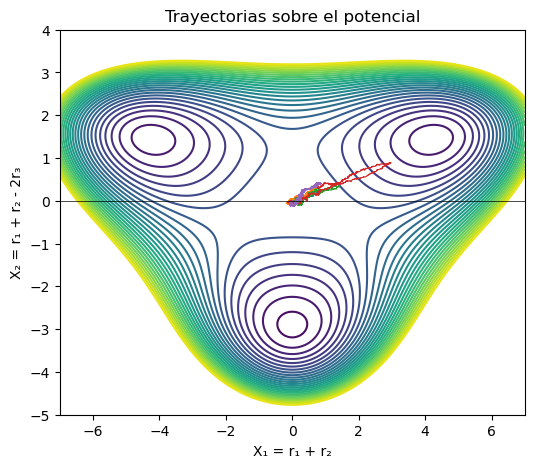

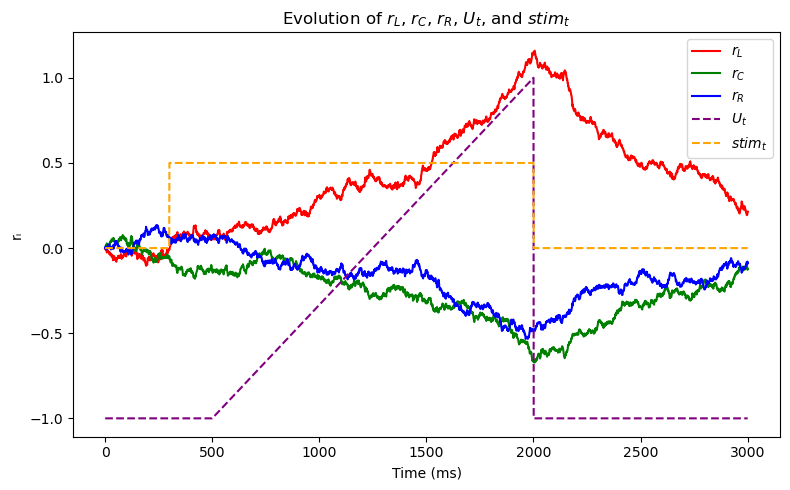

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# ——————————————————————————————————————————————
#  1) Vector de deriva (ya lo tienes lambdificado):
#    F1_num(X1,X2), F2_num(X1,X2)
# ——————————————————————————————————————————————
# Por ejemplo, si usaste:


F1_num = sp.lambdify((X1,X2, I_L, I_C, I_R), F1.subs(subs_dict2), 'numpy')
F2_num = sp.lambdify((X1,X2, I_L, I_C, I_R),  F2.subs(subs_dict2)/2, 'numpy')

def drift(X, I_L=IL_val, I_C=IC_val, I_R=IR_val):
    x, y = X
    return -np.array([F1_num(x, y, I_L, I_C, I_R), F2_num(x, y, I_L, I_C, I_R)/2])


# ——————————————————————————————————————————————
#  2) Potencial: convierte tu V_expr simbólico a función NumPy
# ——————————————————————————————————————————————
# Supongamos que V_expr es un objeto sympy que ya tienes
#   V_expr = ...   # tu expresión de V(X1,X2)
V_num = potencial_num

# ——————————————————————————————————————————————
#  3) Parámetros de simulación y ruido
# ——————————————————————————————————————————————
theta     = 0.5         # umbral sobre r_i
noise_amp = 0.25        # intensidad del ruido
dt        = 1e-3        # paso de tiempo
Tmax      = 3        # tiempo máximo de simulación
n_trajs   = 100       # número de trayectorias Monte Carlo
x0        = np.array([0,0])  # condición inicial de ejemplo
r0 = np.array([0,0,0])  # posición inicial de la partícula
x0 = np.array([(r0[0]+r0[1])/2, (r0[0]-r0[1])/2])  # condición inicial en el espacio de fase

def U_t(t, onset=0.500, offset=1.5):
    return np.where(np.logical_or(t < onset, t > onset + offset), -1, 2 / offset * (t - onset) - 1)

def stim_t(t, onset=0.30, offset=1.7, amplitude=0.5):
    return np.where(np.logical_or(t < onset, t > onset + offset), 0, amplitude)

def simulate_path(x0):
    N = int(Tmax / dt)
    X = np.empty((N+1, 2))
    X[0] = x0
    for i in range(N):
        x, y = X[i]
        dW = np.random.randn(3) * np.sqrt(dt)

        dB1 = (dW[0] - dW[1]) / 2
        dB2 = (dW[0] + dW[1] - 2*dW[2]) / 6
        U = U_t(i*dt)
        S = stim_t(i*dt)
        # Euler–Maruyama
        X[i+1] = X[i] + drift(X[i], U+S, U, U) * dt + noise_amp * np.array([dB1, dB2])

        r1 = (X[i+1, 0] + X[i+1, 1])  # r₁
        r2 = -X[i+1, 0] + X[i+1, 1] # r₂
        r3 = -2*X[i+1, 1]  # r₃

    if  r1 > r2 and r1 > r3:
        return X[:i+2], 'r1', False
    elif  r2 > r1 and r2 > r3:
        return X[:i+2], 'r2', False
    elif r3 > r1 and r3 > r2:
        return X[:i+2], False, True
    return X, False, False


wins = {'r1': 0, 'r2': 0, 'r3': 0}
all_paths = []

for _ in range(n_trajs):
    traj, win_type, win_r3 = simulate_path(x0)
    all_paths.append(traj)
    if win_r3:
        wins['r3'] += 1
    elif win_type == 'r1':
        wins['r1'] += 1
    elif win_type == 'r2':
        wins['r2'] += 1

# probabilidades reales (no asumidas)
p_r1 = wins['r1'] / n_trajs
p_r2 = wins['r2'] / n_trajs
p_r3 = wins['r3'] / n_trajs

print(f"P(r₁ gana) = {p_r1:.3f}")
print(f"P(r₂ gana) = {p_r2:.3f}")
print(f"P(r₃ gana) = {p_r3:.3f}")


# ——————————————————————————————————————————————
#  6) Dibujar: fondo de potencial + unas cuantas trayectorias
# ——————————————————————————————————————————————
# definir malla
xs = np.linspace(-7, 7, 200)
ys = np.linspace(-5, 4, 200)
Xg, Yg = np.meshgrid(xs, ys)
Vg = V_num(Xg, Yg)
Vg = np.clip(Vg, -50, 50)

plt.figure(figsize=(6, 5))

plt.contour(Xg, Yg, Vg, levels=30)

for traj in all_paths[:1]:
    plt.plot(traj[:,0], traj[:,1], lw=0.8)
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('X₁ = r₁ + r₂')
plt.ylabel('X₂ = r₁ + r₂ - 2r₃')
plt.title('Trayectorias sobre el potencial')
plt.show()




def extract_r123(traj):
    X1_vals, X2_vals = traj[:, 0], traj[:, 1]
    r1_vals = (X1_vals + X2_vals)
    r2_vals = (-X1_vals + X2_vals)
    r3_vals = (-2 * X2_vals)
    return r1_vals, r2_vals, r3_vals
plt.figure(figsize=(8, 5))

for traj in all_paths[:1]:  # muestra 5 trayectorias
    r1, r2, r3 = extract_r123(traj)
    t = np.linspace(0, len(traj) * dt, len(traj)) * 1000  
    plt.plot(t, r1, color='red', alpha=1, label=f'$r_L$')
    plt.plot(t, r2, color='green', alpha=1, label='$r_C$')
    plt.plot(t, r3, color='blue', alpha=1, label='$r_R$')

# Add U_t and stim_t lines
t_vals = np.linspace(0, Tmax, len(traj))
u_vals = U_t(t_vals)
stim_vals = stim_t(t_vals)
plt.plot(t_vals * 1000, u_vals, color='purple', linestyle='--', label='$U_t$')
plt.plot(t_vals * 1000, stim_vals, color='orange', linestyle='--', label='$stim_t$')

# evitar múltiples leyendas
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel("Time (ms)")
plt.ylabel("rᵢ")
plt.title("Evolution of $r_L$, $r_C$, $r_R$, $U_t$, and $stim_t$")
plt.tight_layout()
plt.show()



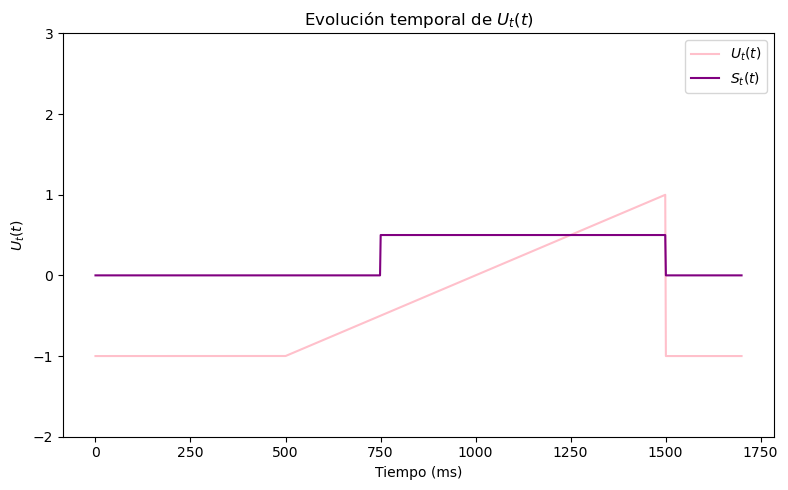

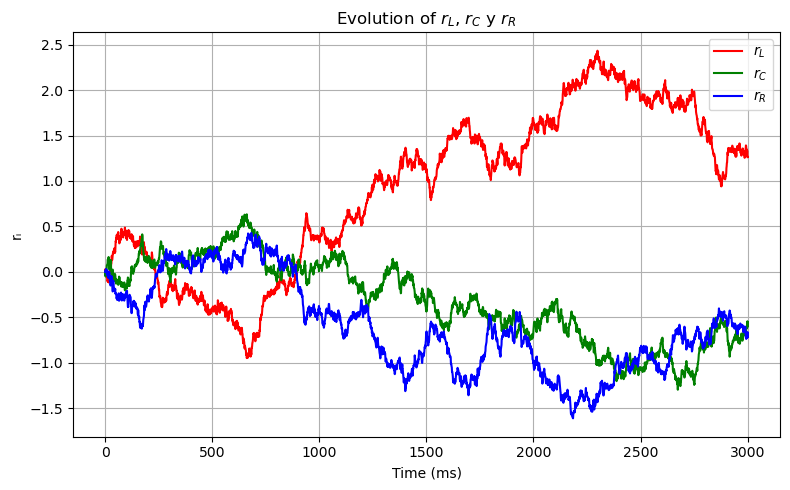

In [318]:
def U_t(t, onset=500, offset=1000):
    return np.where(np.logical_or(t < onset, t > onset + offset), -1, 2 / offset * (t - onset) - 1)

def stim_t(t, onset=750, offset=1500-750, amplitude=0.5):
    return np.where(np.logical_or(t < onset, t > onset + offset), 0, amplitude)

t_vals = np.linspace(0, 1700, 1000)  # Convert time to milliseconds
U_t_vals = U_t(t_vals)  # Scale back to seconds for the function
S = stim_t(t_vals)  # Scale back to seconds for the function

plt.figure(figsize=(8, 5))
plt.plot(t_vals, U_t_vals, label='$U_t(t)$', color='pink')
plt.plot(t_vals, S, label='$S_t(t)$', color='purple')
plt.xlabel("Tiempo (ms)")
plt.ylabel("$U_t(t)$")
plt.title("Evolución temporal de $U_t(t)$")
plt.legend()
plt.ylim(-2,3)
plt.tight_layout()
plt.show()




def extract_r123(traj):
    X1_vals, X2_vals = traj[:, 0], traj[:, 1]
    r1_vals = (X1_vals + X2_vals)
    r2_vals = (-X1_vals + X2_vals)
    r3_vals = (-2 * X2_vals)
    return r1_vals, r2_vals, r3_vals
plt.figure(figsize=(8, 5))

for traj in all_paths[:1]:  # muestra 5 trayectorias
    r1, r2, r3 = extract_r123(traj)
    t = np.linspace(0, len(traj) * dt, len(traj)) * 1000  
    plt.plot(t, r1, color='red', alpha=1, label=f'$r_L$')
    plt.plot(t, r2, color='green', alpha=1, label='$r_C$')
    plt.plot(t, r3, color='blue', alpha=1, label='$r_R$')

# evitar múltiples leyendas
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel("Time (ms)")
plt.ylabel("rᵢ")
plt.title("Evolution of $r_L$, $r_C$ y $r_R$")
plt.grid(True)
plt.tight_layout()
plt.show()


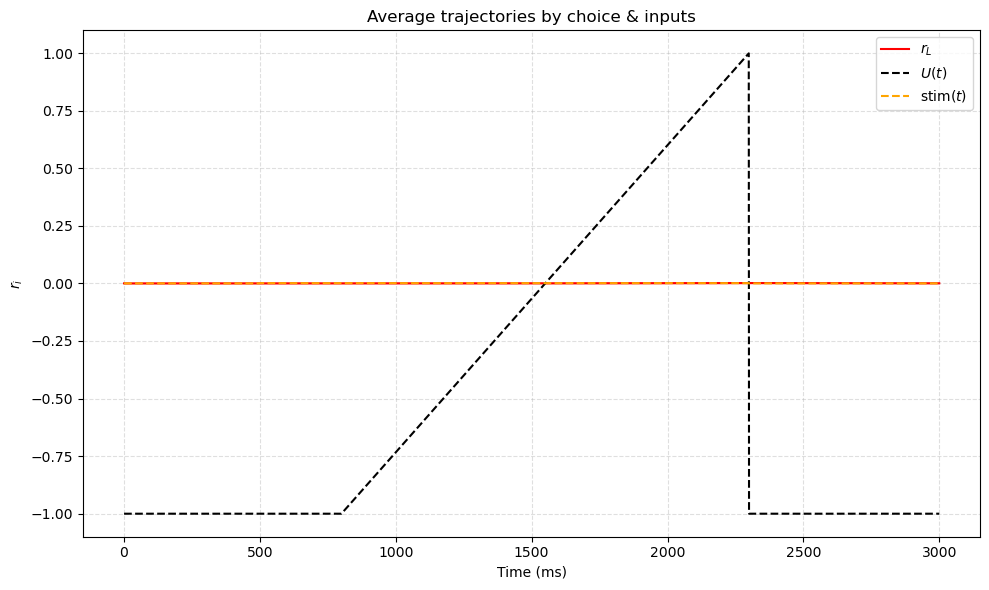

In [326]:
import numpy as np
import matplotlib.pyplot as plt

# ——————————————————————————————————————————————
# Asume que ya tienes:
#   simulate_path(x0) que devuelve (traj, win_type, win_r3)
#   extract_r123(traj) que devuelve (r1_vals, r2_vals, r3_vals)
#   U_t(t) y stim_t(t)
#   dt, Tmax, n_trajs, x0 definidos
# ——————————————————————————————————————————————

# 1) Simular y agrupar trials
r1_trials = []
r2_trials = []
r3_trials = []

for _ in range(n_trajs):
    traj, win_type, win_r3 = simulate_path(x0)
    r1, r2, r3 = extract_r123(traj)
    if win_type == 'r1':
        r1_trials.append(r1)
    elif win_type == 'r2':
        r2_trials.append(r2)
    elif win_r3:
        r3_trials.append(r3)
    # los trials sin umbral los ignoramos

# 2) Preparar tiempos comunes
# Aquí truncamos todos a la longitud mínima para alinear
min_len = min(len(r) for groupe in (r1_trials, r2_trials, r3_trials) for r in groupe)
t = np.linspace(0, dt*(min_len-1), min_len)

# 3) Función auxiliar para plot promedio + banda de error
def plot_avg(trials, label, color):
    arr = np.array([r[:min_len] for r in trials])
    mean = arr.mean(axis=0)
    std  = arr.std(axis=0)
    plt.plot(t*1000, mean, label=label, color=color, lw=1.5)
    plt.fill_between(t*1000, mean-std, mean+std, color=color, alpha=0.2)

# 4) Dibujar
plt.figure(figsize=(10, 6))

# Promedios de r1, r2, r3
if r1_trials:
    plot_avg(r1_trials, '$r_L$', 'red')
if r2_trials:
    plot_avg(r2_trials, '$r_C$', 'green')
if r3_trials:
    plot_avg(r3_trials, '$r_R$', 'blue')

# Perfiles de entrada
U_vals   = U_t(t)
stim_vals= stim_t(t)
plt.plot(t*1000, U_vals,    'k--', label='$U(t)$',   lw=1.5)
plt.plot(t*1000, stim_vals, 'orange', linestyle='--', label='$\\mathrm{stim}(t)$', lw=1.5)

# Estética
plt.xlabel('Time (ms)')
plt.ylabel('$r_i$')
plt.title('Average trajectories by choice & inputs')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()
